# Importing the libraries

In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Installing the Pandas Profiling and importing profile report

In [269]:
pip install pandasprofiling

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pandasprofiling (from versions: none)
ERROR: No matching distribution found for pandasprofiling
You should consider upgrading via the 'C:\Users\kommurir\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [270]:
from pandas_profiling import profile_report

## Importing Warnings to ignore the warning messages

In [271]:
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [272]:
data = pd.read_csv("https://raw.githubusercontent.com/KommuriRaju/Machine-Learning-Projects/main/Logistic%20Regression/Titanic_data_set_Raj")

In [273]:
data.head()

Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Dropping the Unneccesary column

In [274]:
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [276]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [277]:
data.drop(columns='Cabin', inplace = True)

In [278]:
data.head(1)

PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Embarked  
0      0  A/5 21171  7.25        S

In [279]:
data.shape

(891, 11)

In [280]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

## Checking the Null Data

In [281]:
null_data =  data.isnull().sum()

In [282]:
null_data = pd.DataFrame(null_data)

In [283]:
null_data.columns = ['No.of null values']

In [284]:
null_data['Null values %'] = np.round(data.isnull().sum()/data.shape[0],3)*100

In [285]:
null_data

No.of null values  Null values %
PassengerId                  0            0.0
Survived                     0            0.0
Pclass                       0            0.0
Name                         0            0.0
Sex                          0            0.0
Age                        177           19.9
SibSp                        0            0.0
Parch                        0            0.0
Ticket                       0            0.0
Fare                         0            0.0
Embarked                     2            0.2

In [286]:
data[data==0].count().values

array([  0, 549,   0,   0,   0,   0, 608, 678,   0,  15,   0], dtype=int64)

In [287]:
null_data['no.of Zeros'] = data[data==0].count().values

In [288]:
null_data['Zeros %'] = np.round(data[data==0].count().values/data.shape[0],3)*100

In [289]:
null_data

No.of null values  Null values %  no.of Zeros  Zeros %
PassengerId                  0            0.0            0      0.0
Survived                     0            0.0          549     61.6
Pclass                       0            0.0            0      0.0
Name                         0            0.0            0      0.0
Sex                          0            0.0            0      0.0
Age                        177           19.9            0      0.0
SibSp                        0            0.0          608     68.2
Parch                        0            0.0          678     76.1
Ticket                       0            0.0            0      0.0
Fare                         0            0.0           15      1.7
Embarked                     2            0.2            0      0.0

## Creating the Profile Report

In [290]:
data.profile_report()

**Observations:**
- With the help of above profile report we can see there are few missing Values and Zeros present in few columns
- Can see no duplicate rows are there.
- Can see the correlation between the categories as well.

## Handling missing Values

In [291]:
median_age = data.Age.median()

In [292]:
median_fare = data.Fare.median()

In [293]:
print("The median age :" , median_age)
print("The median fare :",  median_fare)

The median age : 28.0
The median fare : 14.4542


In [294]:
data.Age.fillna(median_age, inplace = True)

In [295]:
data.Fare.fillna(median_fare, inplace = True)

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [297]:
data.Embarked.mode()[0]

'S'

In [298]:
data.Embarked = data.Embarked.fillna(data['Embarked'].mode()[0])

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [300]:
data.head(1)

PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Embarked  
0      0  A/5 21171  7.25        S

#### As passenger ID is not related to our taget variable we can drop this column.

In [301]:
data.drop('PassengerId', axis = 1, inplace = True)

## Feature Engineering

#### Let's create a new column which can give the total count of a family size. The +1 we are doing as the person himself adding it to the family.

In [302]:
data['FamilySize'] = data['SibSp'] + data['Parch'] +1

In [303]:
data.head(1)

Survived  Pclass                     Name   Sex   Age  SibSp  Parch  \
0         0       3  Braund, Mr. Owen Harris  male  22.0      1      0   

      Ticket  Fare Embarked  FamilySize  
0  A/5 21171  7.25        S           2

# EDA

In [304]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Using Seaborn

Text(0.5, 1.0, 'Frequency Distribution')

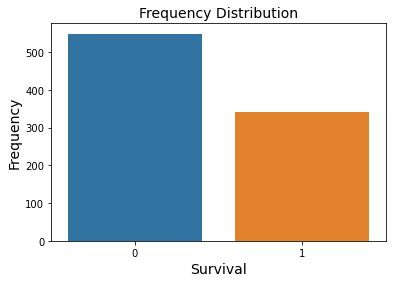

In [306]:
sns.countplot(x = 'Survived', data = data)
plt.xlabel(xlabel = 'Survival', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

### using  the matplot lib

<AxesSubplot:>

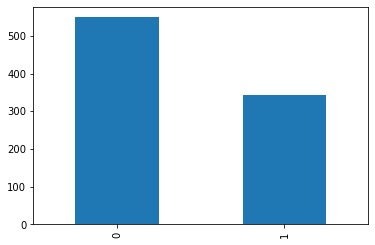

In [307]:
data.Survived.value_counts().plot(kind = 'bar')

#### Will check the percentage of survived and not survived in a pie plot.

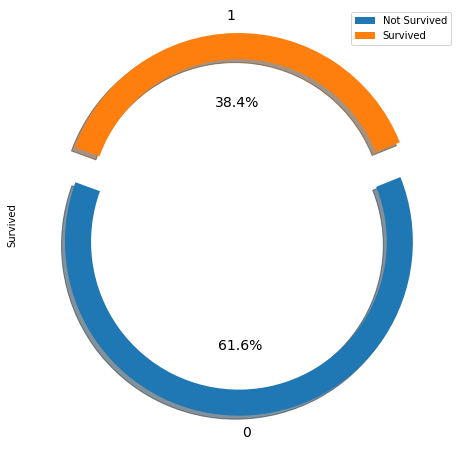

In [308]:
space = np.ones(2)/10
data.Survived.value_counts().plot(kind = 'pie', legend = True, explode = space,autopct = '%3.1f%%', shadow = True , 
                                  wedgeprops = dict(width=0.15), fontsize = 14, startangle = 160, figsize = [15,8])
plt.legend(['Not Survived', 'Survived'])

## Adding two above diagrams as sub plots.

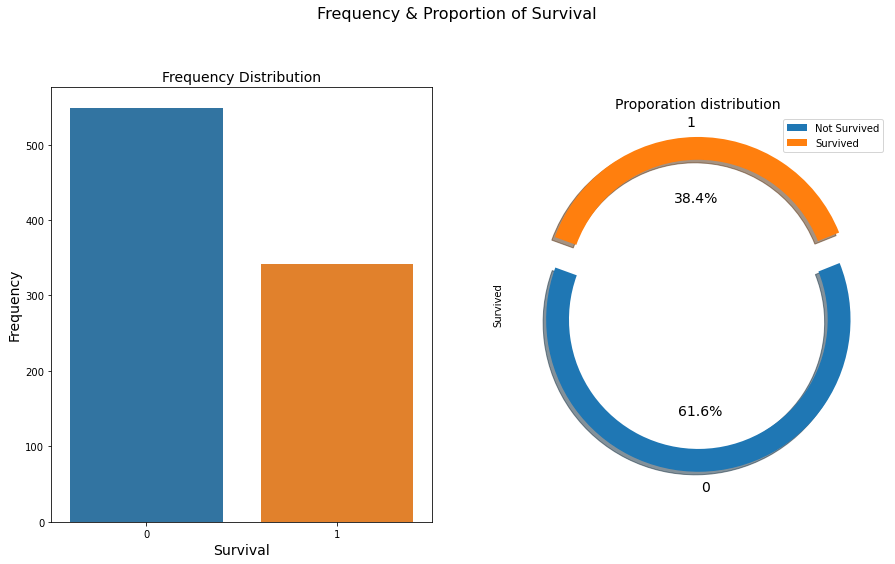

In [309]:
fig = plt.figure(figsize = [15, 8])

plt.subplot(1, 2, 1)

sns.countplot(x = 'Survived', data = data)
plt.xlabel(xlabel = 'Survival', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1,2,2)

space = np.ones(2)/10
data.Survived.value_counts().plot(kind = 'pie', legend = True, explode = space,autopct = '%3.1f%%', shadow = True , 
                                  wedgeprops = dict(width=0.15), fontsize = 14, startangle = 160, figsize = [15,8])
plt.legend(['Not Survived', 'Survived'])
plt.title("Proporation distribution", size = 14)

plt.suptitle(t = 'Frequency & Proportion of Survival', y = 1.02, size = 16)
plt.show()



#### 
- With the above diagrams, we can see that the Survived people are less than the died people.

## Q: Age Vs Survival

Text(0.5, 1.0, 'Distribution of Not Survived people')

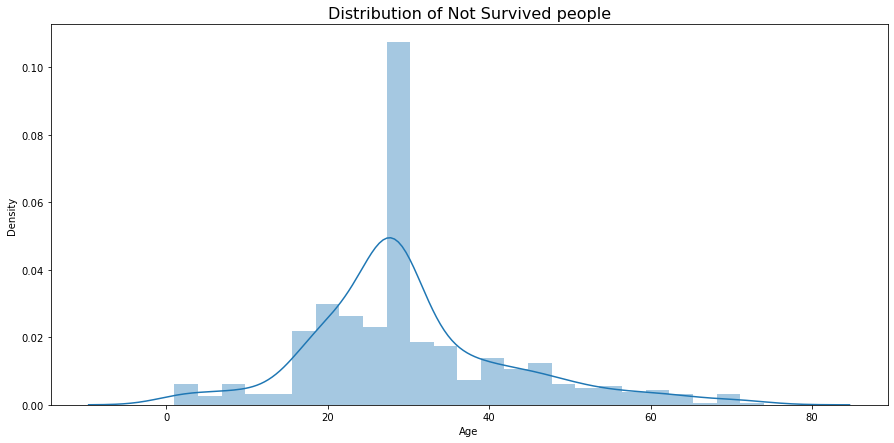

In [310]:
figure = plt.figure(figsize=[15, 7])
sns.distplot(data['Age'][data.Survived==0])
plt.title ("Distribution of Not Survived people", size = 16)

Text(0.5, 1.0, 'Distribution of Survived people')

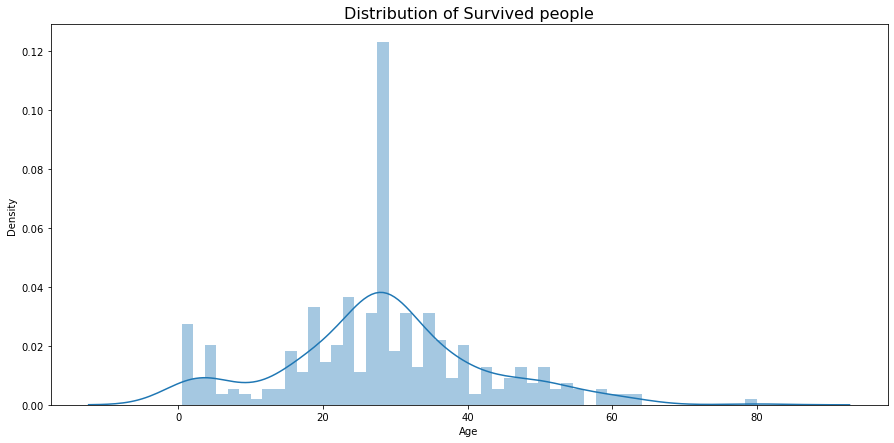

In [311]:
figure = plt.figure(figsize=[15, 7])
sns.distplot(data['Age'][data.Survived==1], bins = 50)
plt.title("Distribution of Survived people", size = 16)


- With the above two diagrams we can see that the distribution is almost similar across age groups.
- In second graph the survived people at the age between 0-10 Yrs are bit high compare to the first graph. So we can clonclude that children were preferred more to get into life boats.

## Passenger class Vs Survival

Text(0.5, 1.0, 'Count of not survived people according to Passenger class')

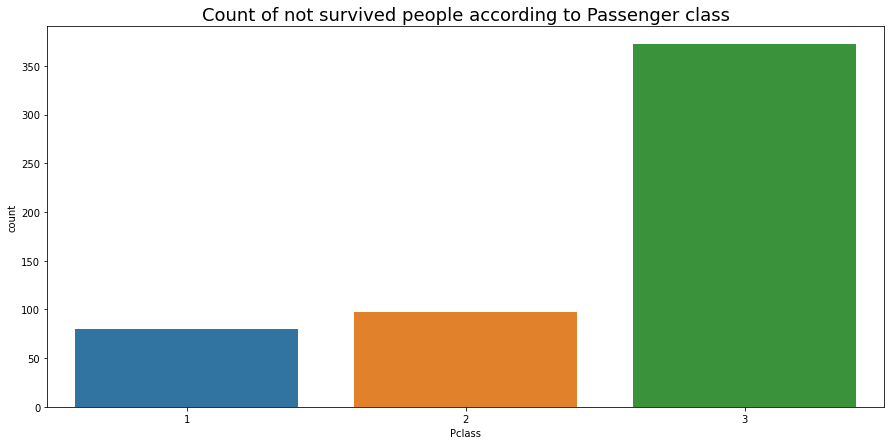

In [312]:
figure = plt.figure(figsize = (15,7))

sns.countplot(data['Pclass'][data.Survived == 0])
plt.title ('Count of not survived people according to Passenger class', size = 18)

Text(0.5, 1.0, 'Count of survived people according to the Passenger class')

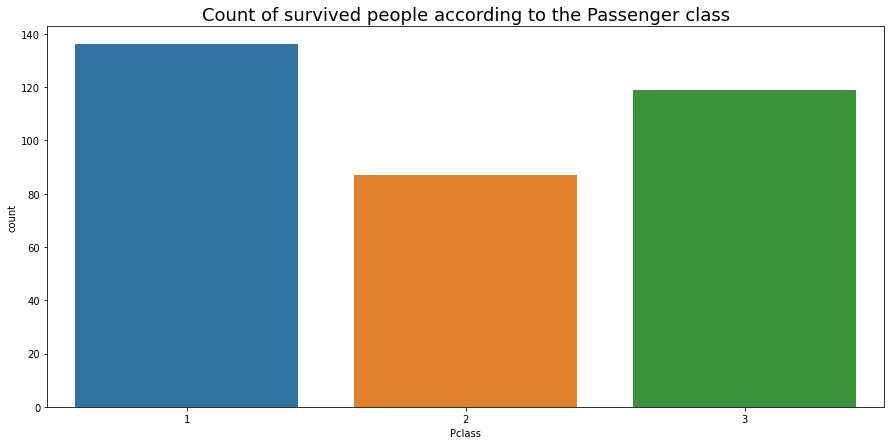

In [313]:
figure = plt.figure(figsize = (15,7))

sns.countplot(data['Pclass'][data.Survived == 1])
plt.title("Count of survived people according to the Passenger class", size = 18)

Text(0.5, 1.0, 'Survived people percentage passenger class wise')

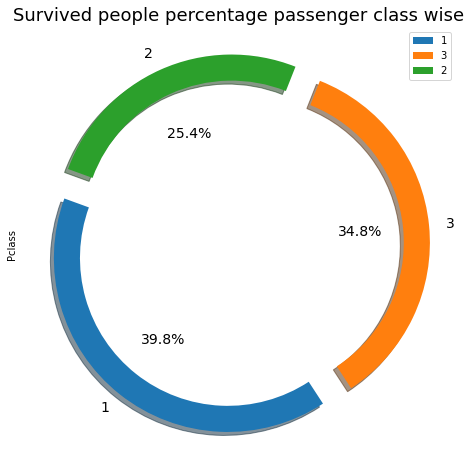

In [314]:
space = np.ones(3)/10
data['Pclass'][data.Survived == 1].value_counts().plot(kind = 'pie', legend = True, explode = space,autopct = '%3.1f%%', shadow = True , 
                                  wedgeprops = dict(width=0.15), fontsize = 14, startangle = 160, figsize = [15,8])

plt.title('Survived people percentage passenger class wise', size = 18)

Text(0.5, 1.0, 'Not Survived people percentage passenger class wise')

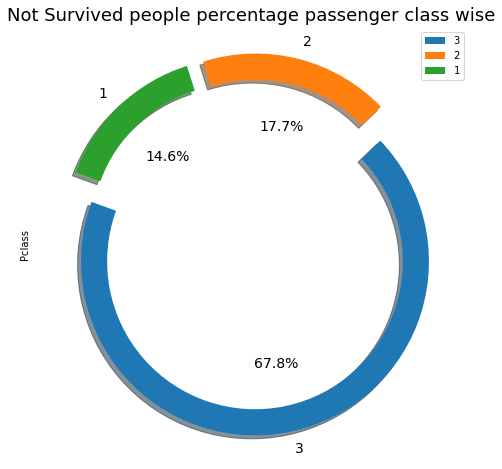

In [315]:
space = np.ones(3)/10
data['Pclass'][data.Survived == 0].value_counts().plot(kind = 'pie', legend = True, explode = space,autopct = '%3.1f%%', shadow = True , 
                                  wedgeprops = dict(width=0.15), fontsize = 14, startangle = 160, figsize = [15,8])

plt.title('Not Survived people percentage passenger class wise', size = 18)

- With the above graphs we can see that Passesnger Class 1 people were given first priority to Evacuate so that class survival percentage is high.

<AxesSubplot:>

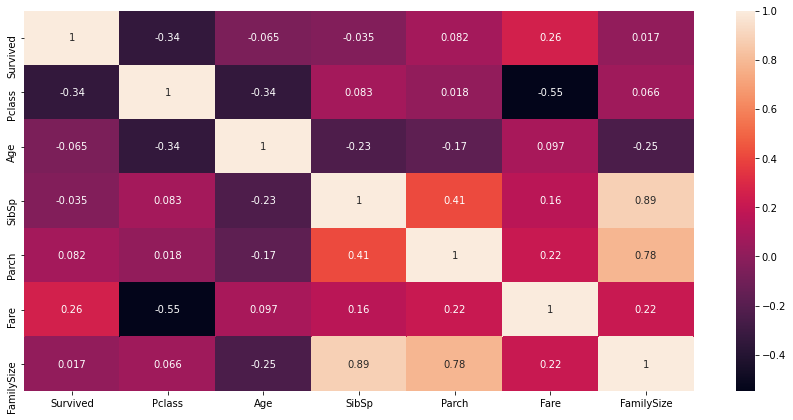

In [316]:
figure = plt.figure(figsize= (15,7))
sns.heatmap(data.corr(), annot =  True)

**Observations**
- Parent Child and Siblings are highly correlated to the Family size as this column made with the mentioned columns.
- Remaining all categories are not much correlated to others.

In [317]:
data[data.Fare == data['Fare'].max()]

Survived  Pclass                                Name     Sex   Age  \
258         1       1                    Ward, Miss. Anna  female  35.0   
679         1       1  Cardeza, Mr. Thomas Drake Martinez    male  36.0   
737         1       1              Lesurer, Mr. Gustave J    male  35.0   

     SibSp  Parch    Ticket      Fare Embarked  FamilySize  
258      0      0  PC 17755  512.3292        C           1  
679      0      1  PC 17755  512.3292        C           2  
737      0      0  PC 17755  512.3292        C           1

- With  the above filter we can see that the Pclass = 1 has the high fare.

## Feature Selection

- As Name, SibSp, Parch and Ticket are not related to our target variable(Survived), we can drop these 4 columns.

In [318]:
data.drop(['Name', 'SibSp', 'Parch', 'Ticket'],axis=1, inplace = True)

In [319]:
data.head(1)

Survived  Pclass   Sex   Age  Fare Embarked  FamilySize
0         0       3  male  22.0  7.25        S           2

## Post Profiling Report

In [320]:
data.profile_report()

In [321]:
data.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
Fare          float64
Embarked       object
FamilySize      int64
dtype: object

In [322]:
data.head(1)

Survived  Pclass   Sex   Age  Fare Embarked  FamilySize
0         0       3  male  22.0  7.25        S           2

- Pclass is a categorical variable to converting it to the Object type.

In [323]:
data.Pclass = data.Pclass.astype(dtype = object)

In [324]:
data.dtypes

Survived        int64
Pclass         object
Sex            object
Age           float64
Fare          float64
Embarked       object
FamilySize      int64
dtype: object

- Doing one-hot encoding to the categorical variables

In [325]:
encoded_data = pd.get_dummies(data)

In [240]:
encoded_data.head(1)

Survived   Age  Fare  FamilySize  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
0         0  22.0  7.25           2         0         0         1           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         1           0           0           1

### Data Preparation

In [242]:
x = encoded_data.drop('Survived', axis=1)

In [243]:
y = encoded_data.Survived

In [244]:
from sklearn.model_selection import train_test_split

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [248]:
print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (801, 11) (801,)
Testing Data Shape: (90, 11) (90,)


## Model Development and Evaluation

In [250]:
from sklearn.linear_model import LogisticRegression

In [251]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\kommurir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [254]:
y_pred_test = logreg.predict(x_test)

In [255]:
y_pred_test

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [256]:
y_pred_train = logreg.predict(x_train)

In [257]:
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,

## Evaluation

In [258]:
from sklearn.metrics import accuracy_score                                          
from sklearn.metrics import confusion_matrix 

In [259]:
confusion_matrix(y_test, y_pred_test)

array([[46,  8],
       [ 7, 29]], dtype=int64)

In [260]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

In [261]:
confusion_matrix

0   1
0  46   8
1   7  29

In [264]:
confusion_matrix.index = ['Actual Died', 'Actual Survived']
confusion_matrix.columns = ['Predicted Died', 'Predicted Survived']

In [265]:
confusion_matrix

Predicted Died  Predicted Survived
Actual Died                  46                   8
Actual Survived               7                  29

- As we know with the help of above table we can see that the model is performing good. 

- Because, True Negatives + True Positives (46 + 29) = 75 is far higher than False Positives + False Negatives (8+7) = 15

## Accuracy

In [267]:
pred = logreg.predict(x_test)
print('Accuracy score for test data is:', accuracy_score(y_test,pred))

Accuracy score for test data is: 0.8333333333333334
